In [1]:
import tensorflow as tf
import numpy as np

from tensorflow import keras
from keras.datasets import mnist, imdb, reuters


#------------------- def methods -----------------------#

# from [[1, 3, 44], [2, 313, 87, 100], [34, 22]] -> matrix [[0, 0, 1],
#                                                          [1, 0, 0, 0], ... ]
def transformData(data, dimHorizontalAxes):
    result = np.zeros((len(data), dimHorizontalAxes))
    
    currentReview = 0
    for review in data:
        for word in review:
            if result[currentReview, word] == 0:
                # a word could be used multiple times in a single review
                result[currentReview, word] = 1
        currentReview += 1
        
    # print(result)
    return result

def transformLabels(data, dimHorizontalAxes):
    result = np.zeros((len(data), dimHorizontalAxes))
    
    currentSample = 0
    for lbl in data:
        result[currentSample, lbl] = 1
        currentSample += 1
 
    # print(result)
    return result

def check_method(tmpTensor):
    counter = 0
    for i in range(len(tmpTensor[0])):
        if tmpTensor[0, i] != tmpTensor[1, i]:
            counter += 1

    return counter
#-------------------------------------------------------#

C:\Users\Saverio\Anaconda3\envs\keras-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Saverio\Anaconda3\envs\keras-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Saverio\Anaconda3\envs\keras-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Saverio\Anaconda3\envs\keras-gpu\lib\site-pack

In [2]:
# load data and analyze the type, rank and dimensionality for each rank 
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000) # at most 10000 words

print('Data types')
print('Train data and labels')
print(type(train_data))
print(type(train_labels))
print('\nTest data and labels')
print(type(test_data))
print(type(test_labels))

print('\nRank and dimensionality for each axis')
print('- train data:')
print(train_data.ndim)
print(train_data.shape)

print('- train labels:')
print(train_labels.ndim)
print(train_labels.shape)


print('\n- test data')
print(test_data.ndim)
print(test_data.shape)

print('- test labels:')
print(test_labels.ndim)
print(test_labels.shape)

Data types
Train data and labels
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>

Test data and labels
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>

Rank and dimensionality for each axis
- train data:
1
(8982,)
- train labels:
1
(8982,)

- test data
1
(2246,)
- test labels:
1
(2246,)


In [3]:
print('Train data content')
print(train_data[0], ' - label: ', train_labels[0])

print('\nTest data content')
print(test_data[0], ' - label: ', test_labels[0])

Train data content
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]  - label:  3

Test data content
[1, 4, 1378, 2025, 9, 697, 4622, 111, 8, 25, 109, 29, 3650, 11, 150, 244, 364, 33, 30, 30, 1398, 333, 6, 2, 159, 9, 1084, 363, 13, 2, 71, 9, 2, 71, 117, 4, 225, 78, 206, 10, 9, 1214, 8, 4, 270, 5, 2, 7, 748, 48, 9, 2, 7, 207, 1451, 966, 1864, 793, 97, 133, 336, 7, 4, 493, 98, 273, 104, 284, 25, 39, 338, 22, 905, 220, 3465, 644, 59, 20, 6, 119, 61, 11, 15, 58, 579, 26, 10, 67, 7, 4, 738, 98, 43, 88, 333, 722, 12, 20, 6, 19, 746, 35, 15, 10, 9, 1214, 855, 129, 783, 21, 4, 2280, 244, 364, 51, 16, 299, 452, 16, 515, 4, 99, 29, 5, 4, 364, 281, 48, 10, 9, 1214, 23, 644, 47, 20, 324, 27, 56

In [4]:
# we have to split train_data in x_train and x_val with their labels

#AND

# we must transform train_data in a tensor, "1 value in each cell of the new data structure" IS THE RULE
# the new data structure for our problem is a tensor with rank 2
# the features inside the matrix are the words, represented by a 0/1 for a word on the horizontal axes

dimensionalityHorizontalAxes = 10000 # we have almost 10000 words
x_train = transformData(train_data[:5982], dimensionalityHorizontalAxes)
x_val = transformData(train_data[5982:len(train_data)], dimensionalityHorizontalAxes)

x_test = transformData(test_data, dimensionalityHorizontalAxes)

In [5]:
# in a multiclass classification problem the best format for the labels is a tensor of rank 2
# for each sample on the vertical axes, and a vector on the horizontal axes with 0/1 for the class of that sample
# the dimensionality for the horizontal axes is equalt to the number of class labels
# 0 0 1 0 0 0 ... 0 0 0
# 1 0 0 0 0 0 ... 0 0 0
# 0 0 0 0 0 0 ... 1 0 0

cardinalityClassLabels = 46
y_train = transformLabels(train_labels[:5982], cardinalityClassLabels)
y_val = transformLabels(train_labels[5982:len(train_labels)], cardinalityClassLabels)
y_test = transformLabels(test_labels, cardinalityClassLabels)

In [6]:
print('New data types')
print('Train data and labels')
print(type(x_train))
print(type(y_train))
print('\nValidation data and labels')
print(type(x_val))
print(type(y_val))
print('\nTest data and labels')
print(type(x_test))
print(type(y_test))

print('\nRank and dimensionality for each axis')
print('- train data:')
print(x_train.ndim)
print(x_train.shape)

print('- train labels:')
print(y_train.ndim)
print(y_train.shape)



print('- validation data:')
print(x_val.ndim)
print(x_val.shape)

print('- validation labels:')
print(y_val.ndim)
print(y_val.shape)



print('\n- test data')
print(x_test.ndim)
print(x_test.shape)

print('- test labels:')
print(y_test.ndim)
print(y_test.shape)

New data types
Train data and labels
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>

Validation data and labels
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>

Test data and labels
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>

Rank and dimensionality for each axis
- train data:
2
(5982, 10000)
- train labels:
2
(5982, 46)
- validation data:
2
(3000, 10000)
- validation labels:
2
(3000, 46)

- test data
2
(2246, 10000)
- test labels:
2
(2246, 46)


In [7]:
print('\nTrain data content')
print(x_train[0], ' - label: ', train_labels[0])

print('\nTest data content')
print(x_test[0], ' - label: ', test_labels[0])


Train data content
[0. 1. 1. ... 0. 0. 0.]  - label:  3

Test data content
[0. 1. 1. ... 0. 0. 0.]  - label:  3


In [8]:
# check method
print(check_method(x_train))
print(check_method(x_test))
print(check_method(x_val))

70
326
104


In [12]:
# we an build our NN considering the problem we are going to face

# model definition 
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(46, activation='relu', input_shape=(10000,))) # 10000 features == words index
model.add(layers.Dense(46, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
          
          
from keras import optimizers
          
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy', 
              metrics=['accuracy']) 

# use verbose=0 if you don't want to see keras text
fitStatistics = model.fit(x_train, y_train, epochs=40, batch_size=512, validation_data=(x_val, y_val))

Train on 5982 samples, validate on 3000 samples
Epoch 1/40
5982/5982 [==============================] - 2s 410us/step - loss: 2.9319 - accuracy: 0.5194 - val_loss: 2.0888 - val_accuracy: 0.6360
Epoch 2/40
5982/5982 [==============================] - 2s 397us/step - loss: 1.7335 - accuracy: 0.6665 - val_loss: 1.5398 - val_accuracy: 0.6833
Epoch 3/40
5982/5982 [==============================] - 2s 386us/step - loss: 1.2947 - accuracy: 0.7357 - val_loss: 1.3291 - val_accuracy: 0.7213
Epoch 4/40
5982/5982 [==============================] - 2s 414us/step - loss: 1.0553 - accuracy: 0.7835 - val_loss: 1.2156 - val_accuracy: 0.7410
Epoch 5/40
5982/5982 [==============================] - 2s 369us/step - loss: 0.8855 - accuracy: 0.8171 - val_loss: 1.1418 - val_accuracy: 0.7603
Epoch 6/40
5982/5982 [==============================] - 2s 386us/step - loss: 0.7529 - accuracy: 0.8412 - val_loss: 1.0824 - val_accuracy: 0.7703
Epoch 7/40
5982/5982 [==============================] - 2s 368us/step - loss

<class 'list'>   [2.9318822307038253, 1.7334504764401286, 1.2947023144855583, 1.0552887342837853, 0.8855099132809501, 0.7529360481784799, 0.6362973361141265, 0.5406131359375826, 0.45533455298999925, 0.3863555592304486, 0.32925825861735075, 0.2779455488390127, 0.23974875376918808, 0.2057980458270503, 0.17936878223177663, 0.16162578441235023, 0.14126060982286154, 0.1312103088445705, 0.11985554389433892, 0.1082261988338281, 0.10214473157921829, 0.09745384163628928, 0.09172493449045797, 0.08907292752371947, 0.08259848674646551, 0.08138280852119566, 0.08257964808918568, 0.07863627471570306, 0.07720503533356805, 0.07165381944087866, 0.07028793326611106, 0.06937906157508099, 0.06901103204078238, 0.07015566457099079, 0.06841694169924714, 0.0673395073018278, 0.0688243163310537, 0.06565461719028132, 0.06586951016134261, 0.06488559091421961]


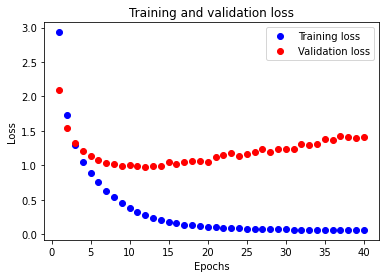

<class 'list'>   [0.51939154, 0.6664995, 0.7357071, 0.78351724, 0.81711805, 0.8411902, 0.86375797, 0.8854898, 0.90371114, 0.9202608, 0.9331327, 0.94232696, 0.94734204, 0.95503175, 0.95987964, 0.96038115, 0.96355736, 0.966232, 0.96790373, 0.97041124, 0.96807086, 0.9689067, 0.9674022, 0.9694082, 0.96873957, 0.9694082, 0.9692411, 0.9690739, 0.96873957, 0.97091275, 0.9695754, 0.9710799, 0.97091275, 0.97091275, 0.9715814, 0.9690739, 0.97024405, 0.9719157, 0.96873957, 0.9700769]


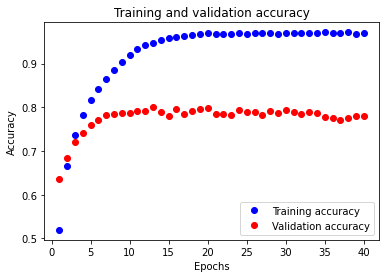

In [16]:
# plot loss score for train and validation data to understand where the overfitting happens
# overfitting happens where training loss and accuracy score are good while validation loss and accuracy degrade

%matplotlib inline
import matplotlib.pyplot as plt

loss = fitStatistics.history['loss'] # == [epoch1 = n, epoch2 = m, ..., epoch20 = z]
val_loss = fitStatistics.history['val_loss']

epochs = range(1, len(loss) + 1)

print(type(loss), ' ', loss)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'ro', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()




accuracy = fitStatistics.history['accuracy']
val_accuracy = fitStatistics.history['val_accuracy']
                                 
print(type(accuracy), ' ',accuracy)
                                 
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'ro', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [20]:
print(model.evaluate(x_test, y_test))

2246/2246 [==============================] - 1s 244us/step
[1.5071129365786844, 0.7724844217300415]


In [18]:
# plot loss score for train and validation data to understand where the overfitting happens
